# CSE 252B: Computer Vision II, Winter 2020 – Assignment 5
### Instructor: Ben Ochoa
### Due: Wednesday, March 18, 2020, 11:59 PM

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* This assignment contains both math and programming problems.
* All solutions must be written in this notebook
* Math problems must be done in Markdown/LATEX.
* You must show your work and describe your solution.
* Programming aspects of this assignment must be completed using Python in this notebook.
* Your code should be well written with sufficient comments to understand, but there is no need to write extra markdown to describe your solution if it is not explictly asked for.
* This notebook contains skeleton code, which should not be modified (This is important for standardization to facilate effecient grading).
* You may use python packages for basic linear algebra, but you may not use packages that directly solve the problem. If you are uncertain about using a specific package, then please ask the instructional staff whether or not it is allowable.
* You must submit this notebook exported as a pdf. You must also submit this notebook as an .ipynb file.
* Your code and results should remain inline in the pdf (Do not move your code to an appendix).
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* It is highly recommended that you begin working on this assignment early.

## Problem 1 (Math): Point on Line Closest to the Origin (5 points)
  Given a line $\boldsymbol{l} = (a, b, c)^\top$, show that the point on
  $\boldsymbol{l}$ that is closest to the origin is the point $\boldsymbol{x} =
  (-ac, -bc, a^2+b^2)^\top$ (Hint: this calculation is needed in the
  two-view optimal triangulation method used below).

"""your solution here"""

A line $ l = (a,b,c)^{T} $ could be represented as $ ax + by + c = 0 $, and any point on this line would be $(x,y,1)^{T}$. We know that a line $ l^{'}$ orthogonal to l and passing through origin $(0,0,1)^{T}$ would be $ bx -ay = 0 $. The intersection of $ l $ and $l^{'}$ is the closest point to the origin on $l$. Therefore, we can get $ y = \frac {-bc}{a^2 + b^2}$ ,  $ x = \frac {-ac}{a^2 + b^2}$. we multiple by $a^2 + b^2$, then we could get $\boldsymbol{x} =
  (-ac, -bc, a^2+b^2)^\top$

## Problem 2 (Programming): Feature Detection (20 points)
Download input data from the course website. The file IMG_5030.JPG
contains image 1 and the file IMG_5031.JPG contains image 2. 

For each input image, calculate an image where each pixel value is the minor
eigenvalue of the gradient matrix

$N=\left[ \begin{array}{cc}
\sum\limits_w I_x^2 & \sum\limits_w I_x I_y\\
\sum\limits_w I_x I_y & \sum\limits_w I_y^2
\end{array} \right]$

where w is the window about the pixel, and $I_x$ and $I_y$ are the gradient images in
the x and y direction, respectively. Calculate the gradient images using the fivepoint
central difference operator. Set resulting values that are below a specified
threshold value to zero (hint: calculating the mean instead of the sum in N allows
for adjusting the size of the window without changing the threshold value). Apply
an operation that suppresses (sets to 0) local (i.e., about a window) nonmaximum
pixel values in the minor eigenvalue image. Vary these parameters such that
around 1350–1400 features are detected in each image. For resulting nonzero pixel
values, determine the subpixel feature coordinate using the Forstner corner point
operator.

#### Report your final values for:
 * the size of the feature detection window (i.e. the size of the window used to calculate the elements in the gradient matrix N)
 * the minor eigenvalue threshold value 
 * the size of the local nonmaximum suppression window 
 * the resulting number of features detected (i.e. corners) in each image.

#### Display figures for:
 * original images with detected features, where the detected features are indicated by a square window (the size of the detection window) about the features
 
A typical implementation takes around <strong>30</strong> seconds. If yours takes more than <strong>60</strong>, you may lose points.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.signal import convolve2d as conv2d
import scipy.ndimage
from scipy.signal import convolve

def rgb2gray(img):
    return 0.299* img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]

def ImageGradient(I):
    # inputs: 
    # I is the input image (may be mxn for Grayscale or mxnx3 for RGB)
    #
    # outputs:
    # Ix is the derivative of the magnitude of the image w.r.t. x
    # Iy is the derivative of the magnitude of the image w.r.t. y
    
    m, n = I.shape[:2]
    """your code here"""
    if len(I.shape) == 3:
        img_gray = rgb2gray(I)
    else:
        img_gray = img

    #Ix,Iy = np.gradient(img_gray)
    kernel = (1.0/12)*np.array([[-1,8,0,-8,1]]).T 
    Ix = convolve(img_gray, kernel.T, mode='same')
    Iy = convolve(img_gray, kernel, mode='same')
    return Ix, Iy

def MinorEigenvalueImage(Ix, Iy, w):
    # Calculate the minor eigenvalue image J
    #
    # inputs:
    # Ix is the derivative of the magnitude of the image w.r.t. x
    # Iy is the derivative of the magnitude of the image w.r.t. y
    # w is the size of the window used to compute the gradient matrix N
    #
    # outputs:
    # J0 is the mxn minor eigenvalue image of N before thresholding
    m, n = Ix.shape[:2]
    J0 = np.zeros((m,n))

    #Calculate your minor eigenvalue image J0.
    """your code here"""
    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix*Iy
    _w = int(w//2)
    bigN = np.zeros((m,n,2,2))
    bigB = np.zeros((m,n,2,1))
    b1 = np.zeros((m,n))
    b2 = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            b1[i][j] = j * Ixx[i][j] + i * Ixy[i][j]
            b2[i][j] = j * Ixy[i][j] + i * Iyy[i][j]
    
    #Calculate your minor eigenvalue image J0.
    """your code here"""
    for i in range(_w,m-_w):
        for j in range(_w,n-_w):
            N = np.zeros((2,2))
            N[0,0] = np.sum(Ixx[i-_w:i+_w+1,j-_w:j+_w+1]) 
            N[1,1] = np.sum(Iyy[i-_w:i+_w+1,j-_w:j+_w+1]) 
            tmp = np.sum(Ixy[i-_w:i+_w+1,j-_w:j+_w+1])
            N[0,1] = N[1,0] = tmp
            bigN[i,j,:,:] = N
            bigB[i,j,0,0] = np.sum(b1[i-_w:i+_w+1,j-_w:j+_w+1]) 
            bigB[i,j,1,0] = np.sum(b2[i-_w:i+_w+1,j-_w:j+_w+1]) 
            trace = np.matrix.trace(N)
            lambd = (trace - np.sqrt(trace**2 - 4*np.linalg.det(N)))/2
            J0[i,j] = lambd
    return J0, bigN, bigB
    
def NMS(J, w_nms):
    # Apply nonmaximum supression to J using window w_nms
    #
    # inputs: 
    # J is the minor eigenvalue image input image after thresholding
    # w_nms is the size of the local nonmaximum suppression window
    # 
    # outputs:
    # J2 is the mxn resulting image after applying nonmaximum suppression
    # 
    
    J2 = J.copy()
    """your code here"""
    m,n = J.shape[:2]
    _w = w_nms //2
    for i in range(m):
        for j in range(n):
            up = max(0,i-_w)
            down = min(i+_w,m-1)
            left = max(0,j-_w)
            right = min(j+_w,n-1)
            _max = np.max(J[up:down+1,left:right+1])
            if _max > J[i,j]:
                J2[i,j] = 0
    return J2
  
def ForstnerCornerDetector(Ix, Iy, w, t, w_nms):
    # Calculate the minor eigenvalue image J
    # Threshold J
    # Run non-maxima suppression on the thresholded J
    # Gather the coordinates of the nonzero pixels in J 
    # Then compute the sub pixel location of each point using the Forstner operator
    #
    # inputs:
    # Ix is the derivative of the magnitude of the image w.r.t. x
    # Iy is the derivative of the magnitude of the image w.r.t. y
    # w is the size of the window used to compute the gradient matrix N
    # t is the minor eigenvalue threshold
    # w_nms is the size of the local nonmaximum suppression window
    #
    # outputs:
    # C is the number of corners detected in each image
    # pts is the 2xC array of coordinates of subpixel accurate corners
    #     found using the Forstner corner detector
    # J0 is the mxn minor eigenvalue image of N before thresholding
    # J1 is the mxn minor eigenvalue image of N after thresholding
    # J2 is the mxn minor eigenvalue image of N after thresholding and NMS

    m, n = Ix.shape[:2]
    J0 = np.zeros((m,n))
    J1 = np.zeros((m,n))

    #Calculate your minor eigenvalue image J0 and its thresholded version J1.
    """your code here"""
                
    #Run non-maxima suppression on your thresholded minor eigenvalue image.
    J2 = NMS(J1, w_nms)
    J0, bigN, bigB = MinorEigenvalueImage(Ix, Iy, w)
    #print("finished MinorEigenvalueImage")
    J1 = J0.copy()
    J1[J1<t] = 0
    #Run non-maxima suppression on your thresholded minor eigenvalue image.
    J2 = NMS(J1, w_nms)
    #Detect corners.
    """your code here"""

    b1 = np.zeros((m,n))
    b2 = np.zeros((m,n))
    C = 0
    corners = []
    for i in range(m):
        for j in range(n):
            if J2[i,j] > 0:
                C += 1
                corner = np.dot(np.linalg.inv(bigN[i,j,:,:]),
                                bigB[i,j,:,:])
                corners.append(corner)
    pts = np.zeros((2,len(corners)))
    for i in range(len(corners)):
        pts[1,i] = corners[i][0]
        pts[0,i] = corners[i][1]
    print("finished ForstnerCornerDetection")
    
    return C, pts, J0, J1, J2


# feature detection
def RunFeatureDetection(I, w, t, w_nms):
    Ix, Iy = ImageGradient(I)
    C, pts, J0, J1, J2 = ForstnerCornerDetector(Ix, Iy, w, t, w_nms)
    return C, pts, J0, J1, J2

/Users/tommyhuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in sqrt
/Users/tommyhuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:138: RuntimeWarning: invalid value encountered in less


finished ForstnerCornerDetection
finished ForstnerCornerDetection
took 82.249894 secs


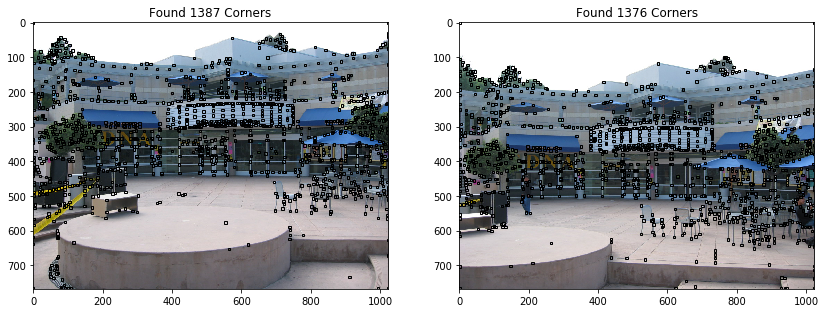

In [2]:
from PIL import Image
import time

# input images
I1 = np.array(Image.open('IMG_5030.jpeg'), dtype='float')/255.
I2 = np.array(Image.open('IMG_5031.jpeg'), dtype='float')/255.

# parameters to tune

w = 7
t = 0.055
w_nms = 7

tic = time.time()

# run feature detection algorithm on input images
C1, pts1, J1_0, J1_1, J1_2 = RunFeatureDetection(I1, w, t, w_nms)
C2, pts2, J2_0, J2_1, J2_2 = RunFeatureDetection(I2, w, t, w_nms)
toc = time.time() - tic
pts1[[0,1]] = pts1[[1,0]]
pts2[[0,1]] = pts2[[1,0]]

print('took %f secs'%toc)
# display results
plt.figure(figsize=(14,24))

# show corners on original images
ax = plt.subplot(1,2,1)
plt.imshow(I1)
for i in range(C1): # draw rectangles of size w around corners
    x,y = pts1[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
# plt.plot(pts1[0,:], pts1[1,:], '.b') # display subpixel corners
plt.title('Found %d Corners'%C1)

ax = plt.subplot(1,2,2)
plt.imshow(I2)

for i in range(C2):
    x,y = pts2[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
# plt.plot(pts2[0,:], pts2[1,:], '.b')
plt.title('Found %d Corners'%C2)

plt.show()

#### Final values for parameters
* w = 7
* t = 0.055
* w_nms = 7
* C1 = 1387
* C2 = 1376

## Problem 3 (Programming): Feature matching (15 points)
Determine the set of one-to-one putative feature correspondences by performing
a brute-force search for the greatest correlation coefficient value (in the range
[-1, 1]) between the detected features in image 1 and the detected features in
image 2. Only allow matches that are above a specified correlation coefficient
threshold value (note that calculating the correlation coefficient allows for adjusting
the size of the matching window without changing the threshold value).
Further, only allow matches that are above a specified distance ratio threshold
value, where distance is measured to the next best match for a given feature.
Vary these parameters such that around <strong>300</strong> putative feature correspondences are
established. Optional: constrain the search to coordinates in image 2 that are
within a proximity of the detected feature coordinates in image 1.

#### Report your final values for:
* the size of the matching window
* the correlation coefficient threshold
* the distance ratio threshold 
* the size of the proximity window (if used)
* the resulting number of putative feature correspondences (i.e. matched features)

#### Display figures for:
* pair of images, where the matched features are indicated by a square window (the size of the matching window) about the feature and a line segment is drawn from the feature to the coordinates of the corresponding feature in the other image

A typical implementation takes around <strong>40</strong> seconds. If yours takes more than <strong>80</strong>, you may lose points.

In [3]:
def NCC(I1, I2, pts1, pts2, w, p):
    # compute the normalized cross correlation between image patches I1, I2
    # result should be in the range [-1,1]
    #
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the matching window to compute correlation coefficients
    # p is the size of the proximity window
    #
    # output:
    # normalized cross correlation matrix of scores between all windows in 
    #    image 1 and all windows in image 2
    
    """your code here"""
    C1 = pts1.shape[1]
    C2 = pts2.shape[1]
    I1_gray = rgb2gray(I1)
    I2_gray = rgb2gray(I2)
    m,n = I1_gray.shape
    w = int(w//2)
    scores = np.zeros((C1,C2))
    for c1 in range(C1):
        for c2 in range(C2):
            y1,x1 = int(pts1[:,c1][1]),int(pts1[:,c1][0])
            y2,x2 = int(pts2[:,c2][1]),int(pts2[:,c2][0])
            if y1-w<0 or y1+w>m-1 or x1-w<0 or x1+w>n-1 or y2-w<0
                            or y2+w>m-1 or x2-w<0 or x2+w>n-1:
                continue
            if np.sqrt((y1-y2)**2+ (x1-x2)**2) > p:
                continue
            patch1 = I1_gray[y1-w:y1+w+1,x1-w:x1+w+1]
            patch2 = I2_gray[y2-w:y2+w+1,x2-w:x2+w+1]
            mean1 = np.mean(patch1)
            mean2 = np.mean(patch2)
            up1 = patch1-mean1
            up2 = patch2-mean2
            down1 = np.sqrt(np.sum(up1**2))
            down2 = np.sqrt(np.sum(up2**2))
            s1 = up1/down1
            s2 = up2/down2
            scores[c1][c2] = np.sum(s1*s2)
            #print(scores[c1][c2] )
    print("NCC finished")
    return scores

def Match(scores, t, d):
    # perform the one-to-one correspondence matching on the correlation coefficient matrix
    # 
    # inputs:
    # scores is the NCC matrix
    # t is the correlation coefficient threshold
    # d distance ration threshold
    #
    # output:
    # 2xM array of the feature coordinates in image 1 and image 2,
    # where M is the number of matches.
    
    """your code here"""
    
    inds = []
    m,n = scores.shape
    best = np.max(scores)
    mask = np.ones((m,n), dtype = bool)
    i,j = np.unravel_index(np.argmax(scores*mask, axis=None), scores.shape)
    
    while best > t:
        scores[i][j] = -1
        nextbest_row = np.max(scores[i,:])
        nextbest_col = np.max(scores[:,j])
        nextbest = max(nextbest_row,nextbest_col)
        idx = np.where(scores == nextbest)
        next_i = idx[0][0]
        next_j = idx[1][0]
        scores[i][j] = best
        if (1-best) < (1-nextbest) * d:
            inds.append((i,j))
        for ii in range(m):
            mask[ii,j] = False
        for jj in range(n):
            mask[i,jj] = False

        best = np.max(scores* mask)
        i,j = np.unravel_index(np.argmax(scores* mask, axis=None), scores.shape)
        
    print("finished Matching")
    return np.array(inds).T

def RunFeatureMatching(I1, I2, pts1, pts2, w, t, d, p):
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the matching window to compute correlation coefficients
    # t is the correlation coefficient threshold
    # d distance ration threshold
    # p is the size of the proximity window
    #
    # outputs:
    # inds is a 2xk matrix of matches where inds[0,i] indexs a point pts1 
    #     and inds[1,i] indexs a point in pts2, where k is the number of matches
    
    scores = NCC(I1, I2, pts1, pts2, w, p)
    inds = Match(scores, t, d)
    return inds

NCC finished
finished Matching
took 31.170340 secs


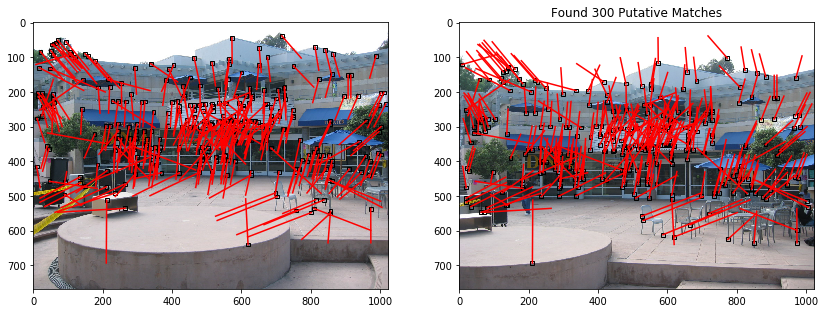

unique points in image 1: 300
unique points in image 2: 300


In [4]:
# parameters to tune

w = 11
t = 0.8
d = 0.9
p = 200

tic = time.time()
# run the feature matching algorithm on the input images and detected features
inds = RunFeatureMatching(I1, I2, pts1, pts2, w, t, d, p)
toc = time.time() - tic

print('took %f secs'%toc)

# create new matrices of points which contain only the matched features 
match1 = pts1[:,inds[0,:]]
match2 = pts2[:,inds[1,:]]

# # display the results
plt.figure(figsize=(14,24))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
plt.title('Found %d Putative Matches'%match1.shape[1])
for i in range(match1.shape[1]):
    x1,y1 = match1[:,i]
    x2,y2 = match2[:,i]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w/2,y2-w/2),w,w, fill=False))

plt.show()

print('unique points in image 1: %d'%np.unique(inds[0,:]).shape[0])
print('unique points in image 2: %d'%np.unique(inds[1,:]).shape[0])

#### Final values for parameters
* w = 11
* t = 0.8
* d = 0.9
* p = 200
* num_matches = 300

## Problem 4 (Programming): Outlier Rejection (20 points)
  
  The resulting set of putative point correspondences should contain both inlier
and outlier correspondences (i.e., false matches). Determine the set of inlier point
correspondences using the M-estimator Sample Consensus (MSAC) algorithm,
where the maximum number of attempts to find a consensus set is determined
adaptively. For each trial, you must use the 7-point algorithm (as described in
lecture) to estimate the fundamental matrix, resulting in 1 or 3 solutions. Calculate 
the (squared) Sampson error as a first order approximation to the geometric error.

Hint: this problem has codimension 1

Also: fix a random seed in your MSAC. If I cannot reproduce your results, you will lose points.

#### Report your values for:
 * the probability $p$ that as least one of the random samples does not contain any outliers
 * the probability $\alpha$ that a given point is an inlier
 * the resulting number of inliers
 * the number of attempts to find the consensus set
 * the tolerance for inliers
 * the cost threshold
 * random seed
 
#### Display figures for:
* pair of images, where the inlier features in each of the images are indicated by a square window about the feature and a line segment is drawn from the feature to the coordinates of the corresponding feature in the other image

tol:5.991464547107979
took 15.686519 secs
39 iterations
inlier count:  220
inliers:  [1, 2, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 24, 25, 27, 28, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 84, 85, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 107, 108, 109, 110, 112, 113, 114, 115, 117, 118, 119, 120, 122, 123, 126, 127, 128, 129, 130, 132, 134, 136, 137, 138, 139, 140, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 157, 158, 159, 161, 162, 165, 166, 167, 168, 169, 170, 171, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 192, 193, 194, 195, 198, 199, 200, 201, 203, 204, 205, 206, 208, 210, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 230, 231, 233, 236, 237, 238, 240, 241, 242, 243, 244, 246, 249, 250, 255, 256, 257, 258, 259, 260, 263, 265, 267

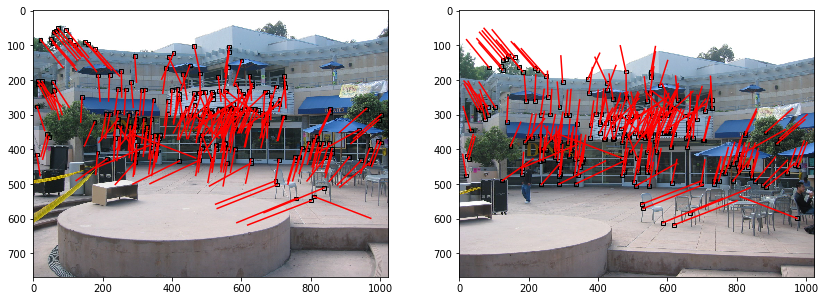

In [13]:
from scipy.stats import chi2
import random
from sympy.abc import alpha
from sympy import Matrix, solve
import numpy as np
import random
import math

def DisplayResults(F, title):
    print(title+' =')
    print(F/np.linalg.norm(F)*np.sign(F[-1,-1]))

def Homogenize(x):
    # converts points from inhomogeneous to homogeneous coordinates
    return np.vstack((x,np.ones((1,x.shape[1]))))

def Dehomogenize(x):
    # converts points from homogeneous to inhomogeneous coordinates
    return x[:-1]/x[-1]
    
def MSAC(match1, match2, thresh, tol, p):
    # Inputs:
    #    match1 - matched feature correspondences in image 1
    #    match2 - matched feature correspondences in image 2
    #    thresh - cost threshold
    #    tol - reprojection error tolerance 
    #    p - probability that as least one of the random samples does not contain any outliers   
    #
    # Output:
    #    consensus_min_cost - final cost from MSAC
    #    consensus_min_cost_model - fundamental matrix F
    #    inliers - list of indices of the inliers corresponding to input data
    #    trials - number of attempts taken to find consensus set
    
    """your code here"""
    
    trials = 0
    max_trials = 100
    consensus_min_cost = np.inf
    consensus_min_cost_model = np.zeros((3,3))
    #inliers = np.random.randint(0, 200, size=100)
    match1_homog = Homogenize(match1)
    match2_homog = Homogenize(match2)
    #random.seed(10000)
    while max_trials > trials and consensus_min_cost > thresh:
        
        rand_idx = (random.sample(range(match1.shape[1]),k = 7))
        x1 = match1_homog [:,rand_idx]
        x2 = match2_homog [:,rand_idx]
        A = np.zeros((7,9))
        for i in range(7):
            xx1 = x1[:,i:i+1]
            xx2 = x2[:,i:i+1]
            A[i:i+1,:] = np.kron(xx2.T,xx1.T)

        u,s,vh = np.linalg.svd(A)
        a = vh[8:9, :]
        b = vh[7:8, :]
        F1 = a.reshape((3,3))
        F2 = b.reshape((3,3))
        F = Matrix(alpha*F1+F2)
        roots = solve(Matrix.det(F), alpha)
        roots = np.array(roots).astype(np.complex64)
        roots = np.real(roots)
        max_error = float('inf')
        FF_best = np.zeros((3,3))
        sampson_best = []
        for i in range(len(roots)):
            error = 0
            FF = roots[i] * F1 + F2
            sampson_error = [] 
            for j in range(match1.shape[1]):
                xx1 = match1_homog [:,j:j+1]
                xx2 = match2_homog [:,j:j+1]
                up = (xx2.T@FF@xx1)**2
                down = (xx2.T@FF[:,0:1])**2 + (xx2.T@FF[:,1:2])**2
                            + (FF[0:1,:]@xx1)**2 + (FF[1:2,:]@xx1)**2
                sampson_error.append(up/down)
                error += up/down
            if error < max_error:
                max_error = error
                FF_best = FF
                sampson_best = sampson_error
                
        cost = 0
        cnt_inliers = 0
        inliers_cur = []
        for i in range(match1.shape[1]):
            if sampson_best[i] < tol:
                cost += sampson_best[i]
                cnt_inliers += 1
                inliers_cur.append(i)
            else:
                cost += tol
                
        if cnt_inliers!=0 and cost < consensus_min_cost:
            w = cnt_inliers/match1.shape[1]
            max_trials = math.log(1-p)/math.log(1-w**7)
            consensus_min_cost = cost
            consensus_min_cost_model = FF_best
            inliers = inliers_cur
        trials += 1
        #print("trials:{}, cost:{}, #inliers:{}, ".format(trials, cost[0][0], cnt_inliers))
    return consensus_min_cost, consensus_min_cost_model, inliers, trials


# MSAC parameters 
thresh = 100
p = 0.99
_alpha = 0.95
variance = 1
tol = chi2.ppf(_alpha, df = 2) * variance
print("tol:{}".format(tol))
#random.seed(100)
np.random.seed(100)

tic=time.time()
cost_MSAC, F_MSAC, inliers, trials = MSAC(match1, match2, 
                                          thresh, tol, p)
# choose just the inliers
xin1 = match1[:,inliers]
xin2 = match2[:,inliers]
outliers = np.setdiff1d(np.arange(pts1.shape[1]),inliers)

toc=time.time()
time_total=toc-tic

# display the results
print('took %f secs'%time_total)
print('%d iterations'%trials)
print('inlier count: ',len(inliers))
print('inliers: ',inliers)
print('MSAC Cost = %.9f'%cost_MSAC)
DisplayResults(F_MSAC, 'F_MSAC')

# display the figures
plt.figure(figsize=(14,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
for i in range(xin1.shape[1]):
    x1,y1 = xin1[:,i]
    x2,y2 = xin2[:,i]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w/2,y2-w/2),w,w, fill=False))

plt.show()

#### Final values for parameters
* random seed = 100
* $p$ = 0.99
* $\alpha$ = 0.95
* tolerance = 5.99
* threshold = 100
* num_inliers = 220
* num_attempts = 39
* consensus_min_cost = 635.09

## Problem 5 (Programming): Linear Estimation of the Fundamental Matrix (15 points)
  Estimate the fundamental matrix $\boldsymbol{F}_\text{DLT}$ from the
  resulting set of inlier correspondences using the direct linear
  transformation (DLT) algorithm (with data normalization).  Include
  the numerical values of the resulting $\boldsymbol{F}_\text{DLT}$, scaled
  such that $||\boldsymbol{F}_\text{DLT}||_\text{Fro} = 1$

In [14]:
def Normalize(pts):
    # data normalization of n dimensional pts #
    # Input:
    # pts - is in inhomogeneous coordinates # Outputs:
        #    pts - data normalized points
    # T - corresponding transformation matrix """your code here"""
    T = np.eye(pts.shape[0]+1) 
    if pts.shape[0] == 2:
        means = np.mean(pts, axis = 1) 
        _vars = np.var(pts, axis = 1) 
        var = np.sum(_vars)
        scale = math.sqrt(2/var) 
        T[0,0] = scale
        T[1,1] = scale
        T[0,2] = -means[0] * scale 
        T[1,2] = -means[1] * scale
    
    if pts.shape[0] == 3:
        means= np.mean(pts, axis = 1) 
        _vars= np.var(pts, axis = 1) 
        var = np.sum(_vars)
        scale = math.sqrt(3/var) 
        T[0,0] = scale
        T[1,1] = scale
        T[2,2] = scale
        T[0,3] = -means[0] * scale 
        T[1,3] = -means[1] * scale 
        T[2,3] = -means[2] * scale
    pts = np.dot(T, Homogenize(pts)) 
    return pts, T

def Homogenize(x):
    # converts points from inhomogeneous to homogeneous coordinates    
    return np.vstack((x,np.ones((1,x.shape[1]))))

def Dehomogenize(x):
    # converts points from homogeneous to inhomogeneous coordinates   
    return x[:-1]/x[-1]

def DLT(x1, x2, normalize=True):
    # Inputs:
    #    x1 - inhomogeneous inlier correspondences in image 1
    #    x2 - inhomogeneous inlier correspondences in image 2
    #    normalize - if True, apply data normalization to x1 and x2
    #
    # Outputs:
    #    F - the DLT estimate of the fundamental matrix  
    
    """your code here"""
    
    # data normalization
    if normalize:
        x1,T1 = Normalize(x1)
        x2,T2 = Normalize(x2)
    A = np.zeros((x1.shape[1],9))
    for i in range(x1.shape[1]):
        xx1 = x1[:,i:i+1]
        xx2 = x2[:,i:i+1]
        Ai = np.kron(xx2.T, xx1.T)
        A[i:i+1,:] = Ai
        
    u,_,vh = np.linalg.svd(A)
    
    F = vh[8:9,:].reshape((3,3))
    u,D_p, vh = np.linalg.svd(F)
    D_p[-1] = 0
    F = u@np.diag(D_p)@vh
    
    if normalize:
        F = T2.T@F@T1
    F = F/np.linalg.norm(F)
    return F

# Uncomment the following lines to use sample inliers.
#xin1_sample = np.loadtxt("hw5_pts1.txt").T
#xin2_sample = np.loadtxt("hw5_pts2.txt").T

# compute the linear estimate with data normalization
print ('DLT with Data Normalization')
time_start=time.time()
F_DLT = DLT(xin1, xin2, normalize=True)
time_total=time.time()-time_start

# display the resulting F_DLT, scaled with its frobenius norm
DisplayResults(F_DLT, 'F_DLT')

DLT with Data Normalization
F_DLT =
[[ 7.22741745e-09 -8.46698156e-08 -7.89066642e-05]
 [ 8.96646029e-07 -8.59153590e-08 -1.16873237e-02]
 [-2.31289506e-04  1.10819023e-02  9.99870261e-01]]


## Problem 6 (Programming): Nonlinear Estimation of the Fundamental Matrix (70 points) 
  Retrieve the camera projection matrices $\boldsymbol{P} = [\boldsymbol{I} \,|\,
  \boldsymbol{0}]$ and $\boldsymbol{P}' = [\boldsymbol{M} \,|\, \boldsymbol{v}]$, where $\boldsymbol{M}$
  is full rank, from $\boldsymbol{F}_\text{DLT}$.  Use the resulting camera
  projection matrix $\boldsymbol{P}'$ associated with the second image and
  the triangulated 3D points as an initial estimate to an iterative
  estimation method, specifically the sparse Levenberg-Marquardt
  algorithm, to determine the Maximum Likelihood estimate of the
  fundamental matrix $\boldsymbol{F} = [\boldsymbol{v}]_\times \boldsymbol{M}$ that
  minimizes the reprojection error.  The initial estimate of the 3D
  points must be determined using the two-view optimal triangulation
  method described in lecture (algorithm 12.1 in the Hartley \&
  Zisserman book, but use the ray-plane intersection method for the
  final step instead of the homogeneous method).  Additionally, you
  must parameterize the camera projection matrix $\boldsymbol{P}'$ associated
  with the second image and the homogeneous 3D scene points that are
  being adjusted using the parameterization of homogeneous vectors
  (see section A6.9.2 (page 624) of the textbook, and the corrections
  and errata).
  
  Report the initial cost (i.e. cost at iteration 0) and the cost at the end
  of each successive iteration. Show the numerical values for the final 
  estimate of the fundamental matrix $\boldsymbol{F}_\text{LM}$, scaled
  such that $||\boldsymbol{F}_\text{LM}||_\text{Fro} = 1$.

In [15]:
#from sympy.abc import alpha
import math
from sympy import solveset,Symbol
def cost_triangulation(t,a,b,c,d,f,f_p):
    cost = 0
    if t == float("inf"):
        cost = 1/f**2 + c**2/(a**2 + f_p**2*c**2)
    else:
        cost = t**2/(1+f**2*t**2) + (c*t+d)**2/((a*t+b)**2+f_p**2*(c*t+d)**2)
    return cost

def getPp(F):
    u,d,vh = np.linalg.svd(F)
    d_p = d
    d_p[-1] = (d[0]+d[1]) / 2
    W = np.array([[0,1,0],[-1,0,0],[0,0,0]])
    Z = np.array([[0,-1,0],[1,0,0],[0,0,1]])
    S = u@W@u.T
    M = u@Z@np.diag(d_p)@vh
    e = np.array([[S[2,1], S[0,2], S[1,0]]]).T
    P_p = np.hstack((M,e))
    return P_p

def correct_2dpoint(x1,x2,F):
    '''
    return corrected x1, x2 in homogeneous coordinate
    '''

    x1_corrected = np.zeros(x1.shape)
    x2_corrected = np.zeros(x2.shape)
    for i in range(x1.shape[1]):
        xx = x1[:,i:i+1]
        xx_p = x2[:,i:i+1] 
       
        ### Step 1: Construct T maps to origin ###
        T = np.zeros((3,3))
        T_p = np.zeros((3,3))
        T = np.array([[xx[2][0],0,-xx[0][0]],[0,xx[2][0],
                                    -xx[1][0]],[0,0,xx[2][0]]])
        T_p = np.array([[xx_p[2][0],0,-xx_p[0][0]],[0,
                        xx_p[2][0],-xx_p[1][0]],[0,0,xx_p[2][0]]])
       

        ### Step2: form Fs ###
        Fs = np.linalg.inv(T_p.T)@F@np.linalg.inv(T)
        
        ### Step3: compute e, e_p from Fs ###
        u, s, vh = np.linalg.svd(Fs)
        #print("s.shape:{}".format(s.shape))
        e = vh[2:3,:].T
        e1,e2,e3 = e[0][0], e[1][0],e[2][0]
        u, s, vh = np.linalg.svd(Fs.T)
        e_p = vh[2:3,:].T
        e1_p,e2_p,e3_p = e_p[0][0], e_p[1][0], e_p[2][0]
        
        ### Step4 : scale e ###
        e = (1/ (e1**2+e2**2))**0.5 * e
        e_p =  (1/ (e1_p**2+e2_p**2))**0.5 * e_p
        
        ### Step5: form R, R_p ###
        R = np.array([[e1,e2,0],[-e2,e1,0],[0,0,1]])
        R_p = np.array([[e1_p,e2_p,0],[-e2_p,e1_p,0],[0,0,1]])
        
        ### Step6: reform Fs ###
        Fs = R_p@Fs@R.T
        
        ### Step7: check Fs's form ###
        a,b,c,d = Fs[1][1], Fs[1][2], Fs[2][1], Fs[2][2]
        f,f_p = e3,e3_p
        #print("a:{},b:{},c:{},d:{}".format())
        assert np.isclose(Fs[0,1] , -f_p*c)
        assert np.isclose(Fs[0,2] , -f_p*d)
        assert np.isclose(Fs[1,0] , -f*b)
        assert np.isclose(Fs[2,0] , -f*d)
        
        ### Step8: form g(t) ###
        t = Symbol('t') 
        roots = solveset(t*((a*t+b)**2 + f_p**2*(c*t+d)**2)**2
                - (a*d-b*c)*(1-f**2*t**2)**2*(a*t+b)*(c*t+d),t)
        roots = list(roots)
        roots = np.array(roots).astype(np.complex64)
        roots = np.real(roots)
        root_best = 0
        cost_max = float("inf")
        t_best = None
        for tt in roots:
            cost = cost_triangulation(tt,a,b,c,d,f,f_p)
            if cost < cost_max:
                cost_max = cost
                t_best = tt
                
        t_infinite = float("inf")
        cost = cost_triangulation(t_infinite,a,b,c,d,f,f_p)
        if cost < cost_max:
            cost_max = cost
            t_best = t_infinite
            
        if t_best == float('inf'):
            l = np.array([[f,0,-1]]).T
            l_p = np.array([[-f_p*c, a,c]]).T
        else:
            l = np.array([[t_best*f, 1, -t_best]]).T
            l_p = np.array([[-f_p*(c*t_best+d), a*t_best+b, c*t_best+d]]).T
            
        ### Step9: Find closest point to (0,0,1) on line ###
        
        xx_close = np.zeros((3,1))
        xx_close_p = np.zeros((3,1))
        
        xx_close[0,0] = -l[0,0]*l[2,0]
        xx_close[1,0] = -l[1,0]*l[2,0]
        xx_close[2,0] = l[0,0]**2 + l[1,0]**2
        xx_close_p[0,0] = -l_p[0,0]*l_p[2,0]
        xx_close_p[1,0] = -l_p[1,0]*l_p[2,0]
        xx_close_p[2,0] = l_p[0,0]**2 + l_p[1,0]**2
        x1_corrected[:,i:i+1] = np.linalg.inv(T)@R.T@xx_close
        x2_corrected[:,i:i+1] = np.linalg.inv(T_p)@R_p.T@xx_close_p
    print("2d correction finished!")
    return x1_corrected, x2_corrected

def triangulation(x1, x2, F, P_p):
    x1_correct, x2_correct = correct_2dpoint(x1,x2,F)
    x_scene = np.zeros((4, x1.shape[1]))
    for i in range(x1.shape[1]):
        l_p = F @ x1_correct[:,i:i+1]
        l_p_ortho = np.zeros((3,1))
        l_p_ortho[0,0] = -l_p[1,0]*x2_correct[2,i]
        l_p_ortho[1,0] = l_p[0,0]*x2_correct[2,i]
        l_p_ortho[2,0] = l_p[1,0]*x2_correct[0,i] - l_p[0,0]*x2_correct[1,i]
        
        Pi_i = P_p.T @ l_p_ortho
        x_scene_i = np.zeros((4,1))
        x_scene_i[0,0] = Pi_i[3,0]*x1_correct[0,i:i+1]
        x_scene_i[1,0] = Pi_i[3,0]*x1_correct[1,i:i+1]
        x_scene_i[2,0] = Pi_i[3,0]*x1_correct[2,i:i+1]
        x_scene_i[3,0] = -(Pi_i[0,0]*x1_correct[0,i:i+1] + 
            Pi_i[1,0]*x1_correct[1,i:i+1] + Pi_i[2,0]*x1_correct[2,i:i+1])
        x_scene[:,i:i+1] = x_scene_i
    print("triangulation finished!")
    return x_scene, x1_correct, x2_correct
        

def Sinc(x):
    """your code here"""
    if x == 0:
        return 1
    else:
        return math.sin(x)/x
    
def dSinc(x):
    if x == 0:
        return 0
    return (math.cos(x)/x) - (math.sin(x)/(x**2))

def Parameterize(P):
    # takes all optimization variables and parameterizes all of them
    # in this case it is just P, but in future assignments it will
    # be more useful
    return ParameterizeHomog(P.reshape(-1,1))

def Deparameterize(p):
    # Deparameterize all optimization variables 
    return DeParameterizeHomog(p).reshape(3,4)

def ParameterizeALL(x):
    '''
    x.shape = 3 * N
    '''
    N = x.shape[1]
    scene_para = np.zeros((x.shape[0]-1, x.shape[1]))
    for i in range(N):
        scene_para[:,i:i+1] = ParameterizeHomog(x[:,i:i+1])
    return scene_para

def DeparameterizeALL(x):
    '''
    x.shape = 2 * N
    '''
    N = x.shape[1]
    scene_depara = np.zeros((x.shape[0]+1, x.shape[1]))
    for i in range(N):
        scene_depara[:,i:i+1] = DeParameterizeHomog(x[:,i:i+1])
    return scene_depara

def ParameterizeHomog(V):
    # Given a homogeneous vector V return its minimal parameterization 
    """your code here"""
    v = V / np.linalg.norm(V)
    a = v[0][0]
    b = v[1:,:]
    v_hat = 2/(Sinc(math.acos(a)))*b
    v_norm = np.linalg.norm(v_hat)
    if v_norm > math.pi:
        scale = 1-(2*math.pi/v_norm)*math.ceil((v_norm - math.pi)/(2*math.pi))
        v_hat = scale * v_hat 
    return v_hat

def DeParameterizeHomog(v):
    # Given a parameterized homogeneous vector return its deparameterizatio """your code here"""
    v_norm = np.linalg.norm(v)
    a = math.cos(v_norm/2)
    b = Sinc(v_norm /2 )*0.5 * v.T
    v_bar = np.zeros((v.shape[0]+1,1))
    v_bar[0,0] = a
    v_bar[1:v.shape[0]+1,:] = b.T
    v_bar = v_bar/ np.linalg.norm(v_bar)
    return v_bar

def dvbar_dv(v, v_bar):
    '''
    v is parameterized vector
    v_bar is deparametereized vector
    '''
    v_norm = np.linalg.norm(v)
    a = v_bar[0,0]
    b = v_bar[1:,:]
    n = b.shape[0]
    if v_norm == 0:
        av = np.zeros((1,n))
        bv = 0.5 *np.eye(n)
    else: 
        av = -0.5 * b.T
        _dsinc = dSinc(v_norm/ 2)
        bv = 0.5*Sinc(v_norm/2)*np.eye(n) + (1/(4*v_norm)) 
                            * _dsinc * np.dot(v, v.T)
    _dvbar_dv = np.vstack((av,bv))
    return _dvbar_dv
    
def getA(H,x_scene_hat):
    x2_p_hat_homo = Dehomogenize(np.dot(H,x_scene_hat))
    h = Parameterize(H)
    
    w_p = np.dot(H[2:3,:], x_scene_hat)[0][0]
    dxbar_dh = np.zeros((2,12))
    dxbar_dh[0:1, :4] = x_scene_hat.T
    dxbar_dh[1:2, 4:8] = x_scene_hat.T
    dxbar_dh[0:1, 8:] = -x2_p_hat_homo[0][0]* x_scene_hat.T
    dxbar_dh[1:2, 8:] = -x2_p_hat_homo[1][0]* x_scene_hat.T
    dxbar_dh = (1/w_p) * dxbar_dh
    h_bar = DeParameterizeHomog(h)
    
    dhbar_dh = dvbar_dv(h, h_bar)
    return np.dot(dxbar_dh,dhbar_dh)

def getB(H, x_scene):
    dx_dxs = np.zeros((2,4))
    w_p = np.dot(H[2:3,:], x_scene)[0][0]
    
    dx_dxs[0:1,:] = H[0:1,:] - Dehomogenize(H@x_scene)[0][0] * H[2:3,:]
    dx_dxs[1:2,:] = H[1:2,:] - Dehomogenize(H@x_scene)[1][0] * H[2:3,:]
    
    dx_dxs = (1/w_p) * dx_dxs
    x_scene_hat = Parameterize(x_scene)
    x_scene_bar = DeParameterizeHomog(x_scene_hat)
    dxsbar_dxs = dvbar_dv(x_scene_hat, x_scene_bar)
    return np.dot(dx_dxs,dxsbar_dxs)

def computecost_LM(error, error_p, T1, T2):
    sigma = (T1[0,0]**2)* np.eye(2)
    sigma_p = (T2[0,0]**2)* np.eye(2)
    N = error.shape[1]
    cost = 0
    for i in range(N):
        cost = cost + error[:,i:i+1].T@np.linalg.inv(sigma)@error[:,i:i+1]
        + error_p[:,i:i+1].T@np.linalg.inv(sigma_p)@error_p[:,i:i+1]
    
    return cost


In [16]:
from scipy.linalg import block_diag
import pickle

def LM(F, x1, x2, x_scene,P_p,  max_iters, lam):
    # Input:
    #    F - DLT estimate of the fundamental matrix
    #    x1 - inhomogeneous inlier points in image 1
    #    x2 - inhomogeneous inlier points in image 2
    #    max_iters - maximum number of iterations
    #    lam - lambda parameter
    # Output:
    #    F - Final fundamental matrix obtained after convergence
    
    """your code here"""

    x1_norm, T1 = Normalize(x1)
    x2_norm, T2 = Normalize(x2)

    x_scene_norm, U = Normalize(Dehomogenize(x_scene))
    
    sigmax = (T1[0,0]**2)* np.eye(2)
    sigmax_p = (T2[0,0]**2)* np.eye(2)
    
    P1 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
    P1 = T1@P1@np.linalg.inv(U)
    P_p = T2@P_p@np.linalg.inv(U)

    p = Parameterize(P_p)
    error = Dehomogenize(x1_norm) - Dehomogenize(P1 @x_scene_norm)
    error_p = Dehomogenize(x2_norm) - Dehomogenize(P_p@x_scene_norm)
    precost = computecost_LM(error, error_p, T1, T2)
    _iter = 0

    N = x1.shape[1]
    x_scene_para = ParameterizeALL(x_scene_norm)
    max_iters = 100
    print()
    print("iter:{:3d},  cost:{:.6f}".format(_iter,precost[0][0]))
    while _iter < max_iters: 
        A_p = np.zeros((2*N, 11))
        B = np.zeros((2*N, 3))
        B_p = np.zeros((2*N, 3))
        U_p = np.zeros((11, 11))
        V = np.zeros((3*N, 3))
        W_p = np.zeros((11, 3*N))
        epslon_a = np.zeros((11,1))
        epslon_b = np.zeros((3,N))
        s_minus = np.zeros((11,11))
        epslon_minus = np.zeros((11,1))
        
        #H = Deparameterize(h)
        for i in range(x1.shape[1]):  
            x_scene_ele = x_scene_norm[:,i:i+1]
            Ai_p = getA(P_p,x_scene_ele)
            A_p[2*i:2*i+2,:] = Ai_p
            Bi = getB(P1, x_scene_ele)
            B[2*i:2*i+2,:] = Bi
            Bi_p = getB(P_p, x_scene_ele)
            B_p[2*i:2*i+2,:] = Bi_p
            U_p += Ai_p.T@np.linalg.inv(sigmax_p)@Ai_p
            Vi = Bi.T@np.linalg.inv(sigmax)@Bi + Bi_p.T@np.linalg.inv(sigmax_p)@Bi_p
            V[3*i:3*i+3,:] = Vi
            Wi_p = Ai_p.T @np.linalg.inv(sigmax_p) @ Bi_p
            W_p[:,3*i:3*i+3] = Wi_p
            epslon = Dehomogenize(x1_norm[:,i:i+1]) -  Dehomogenize(P1@x_scene_ele)
            epslon_p = (Dehomogenize(x2_norm[:,i:i+1]) -  Dehomogenize(P_p@x_scene_ele))
            epslon_a += Ai_p.T @ np.linalg.inv(sigmax_p) @ epslon_p
            epslon_bi = Bi.T@np.linalg.inv(sigmax)@epslon + 
                        Bi_p.T@np.linalg.inv(sigmax_p)@epslon_p
            epslon_b[:,i:i+1] = epslon_bi
            s_minus += Wi_p @ np.linalg.inv(Vi+lam * np.eye(3))@Wi_p.T
            epslon_minus += Wi_p @ np.linalg.inv(Vi+lam * np.eye(3)) @ epslon_bi

        s_p = U_p + lam * np.eye(11) + s_minus
        e_p = epslon_a - epslon_minus
        delta_a = np.linalg.inv(s_p) @ e_p
        # Adjust h
        p0 = p + delta_a
        P_p0 = Deparameterize(p0)
        x_scene0 = np.zeros((3,x1.shape[1]))
        # Adjust x_scene
        for i in range(x1.shape[1]):
            Vi = V[3*i:3*i+3,:]
            epslon_bi = epslon_b[:,i:i+1]
            Wi_p = W_p[:,3*i:3*i+3]
            delta_bi =  np.linalg.pinv(Vi+lam * np.eye(3))@(epslon_bi - Wi_p.T@delta_a)
            x_scene0[:,i:i+1] = x_scene_para[:,i:i+1] + delta_bi 
        error0 = Dehomogenize(x1_norm) - Dehomogenize(P1@DeparameterizeALL(x_scene0))
        error_p0 = Dehomogenize(x2_norm) - Dehomogenize(P_p0@DeparameterizeALL(x_scene0))
        cost0 = computecost_LM(error0, error_p0, T1, T2)
        #print("iter:{},cost:{}".format(_iter,cost0[0][0]))
        
        if cost0 < precost:
            _iter += 1
            print("iter:{:3d}, cost:{:.6f}".format(_iter,cost0[0][0]))
            if abs(cost0 - precost)< 1e-15:
                break
            precost = cost0
            lam = 0.1*lam
            p = p0
            P_p = Deparameterize(p)
            x_scene_norm = DeparameterizeALL(x_scene0)
        else:
            lam = 10*lam
        
        if lam > 1e20:
            break
    P_p = np.linalg.inv(T2)@P_p@U
    
    [e1,e2,e3] = P_p[:,-1]
    e = np.array([[0,-e3, e2],[e3,0,-e1],[-e2, e1,0]])
    F = e@P_p[:3,:3]
    print()
    return F

# LM hyperparameters
lam = .001
max_iters = 100

# Run LM initialized by DLT estimate
print ('Sparse LM')
time_start=time.time()
#xin1 = np.loadtxt("hw5_pts1.txt").T
#xin2 = np.loadtxt("hw5_pts2.txt").T

P_p = getPp(F_DLT)
x_scene, x1_correct, x2_correct = triangulation(Homogenize(xin1),
                                        Homogenize(xin2), F_DLT, P_p)
F_LM = LM(F_DLT, xin1, xin2, x_scene,P_p, max_iters, lam)

time_total=time.time()-time_start
print('took %f secs'%time_total)

# display the resulting F_LM, scaled with its frobenius norm
DisplayResults(F_LM, 'F_LM')

Sparse LM
2d correction finished!
triangulation finished!

iter:  0,  cost:117.378616
iter:  1, cost:117.029265
iter:  2, cost:111.652900
iter:  3, cost:109.849040
iter:  4, cost:108.603491
iter:  5, cost:107.660345

took 37.852000 secs
F_LM =
[[ 7.45118521e-09 -8.59263556e-08 -8.32943479e-05]
 [ 8.88889451e-07 -8.53767574e-08 -1.17264205e-02]
 [-2.23931687e-04  1.11208091e-02  9.99869372e-01]]


### LM on Sample Points 

In [17]:
### LM on sample points ###
xin1_sample = np.loadtxt("hw5_pts1.txt").T
xin2_sample = np.loadtxt("hw5_pts2.txt").T
F_DLT_sample = DLT(xin1_sample, xin2_sample, normalize=True)
print ('Sparse LM (sample points)')
time_start=time.time()
P_p_sample = getPp(F_DLT_sample)
x_scene_sample, x1_correct_sample, x2_correct_sample
    = triangulation(Homogenize(xin1_sample), Homogenize(xin2_sample), F_DLT_sample, P_p_sample)
F_LM_sample = LM(F_DLT_sample, xin1_sample, xin2_sample,
                 x_scene_sample,P_p_sample, max_iters, lam)
time_total=time.time()-time_start
print('took %f secs'%time_total)
DisplayResults(F_LM_sample, 'F_LM_sample')

Sparse LM (sample points)
2d correction finished!
triangulation finished!

iter:  0,  cost:98.662270
iter:  1, cost:97.064921
iter:  2, cost:91.924642

took 35.465032 secs
F_LM_sample =
[[ 4.18628756e-09  2.57216697e-06 -8.15564865e-04]
 [-1.45044244e-06  3.91930235e-07 -1.09187954e-02]
 [ 5.74743758e-04  9.95079250e-03  9.99890377e-01]]


## Problem 7 (Programming): Point to Line Mapping (10 points)
  Qualitatively determine the accuracy of $\boldsymbol{F}_\text{LM}$ by
  mapping points in image 1 to epipolar lines in image 2.  Visually identify
  three distinct corners $\boldsymbol{x}_{\{1,2,3\}}$ distributed in image 1
  that are not in the set of inlier correspondences and map them to
  epipolar lines $\boldsymbol{l'}_{\{1,2,3\}} = \boldsymbol{F}_\text{LM}
  \boldsymbol{x}_{\{1,2,3\}}$ in the second image under the fundamental
  matrix $\boldsymbol{F}_\text{LM}$.

  Include a figure containing the pair of images,
  where the three points in image 1 are indicated by a square (or
  circle) about the feature and the corresponding epipolar lines are
  drawn in image 2. Comment on the qualitative accuracy of the mapping. (Hint: each line 
  $\boldsymbol{l'}_i$ should pass through the point $\boldsymbol{x'}_i$ in image 2 that 
  corresponds to the point $\boldsymbol{x}_i$ in image 1).

im_height:768, im_width:1024


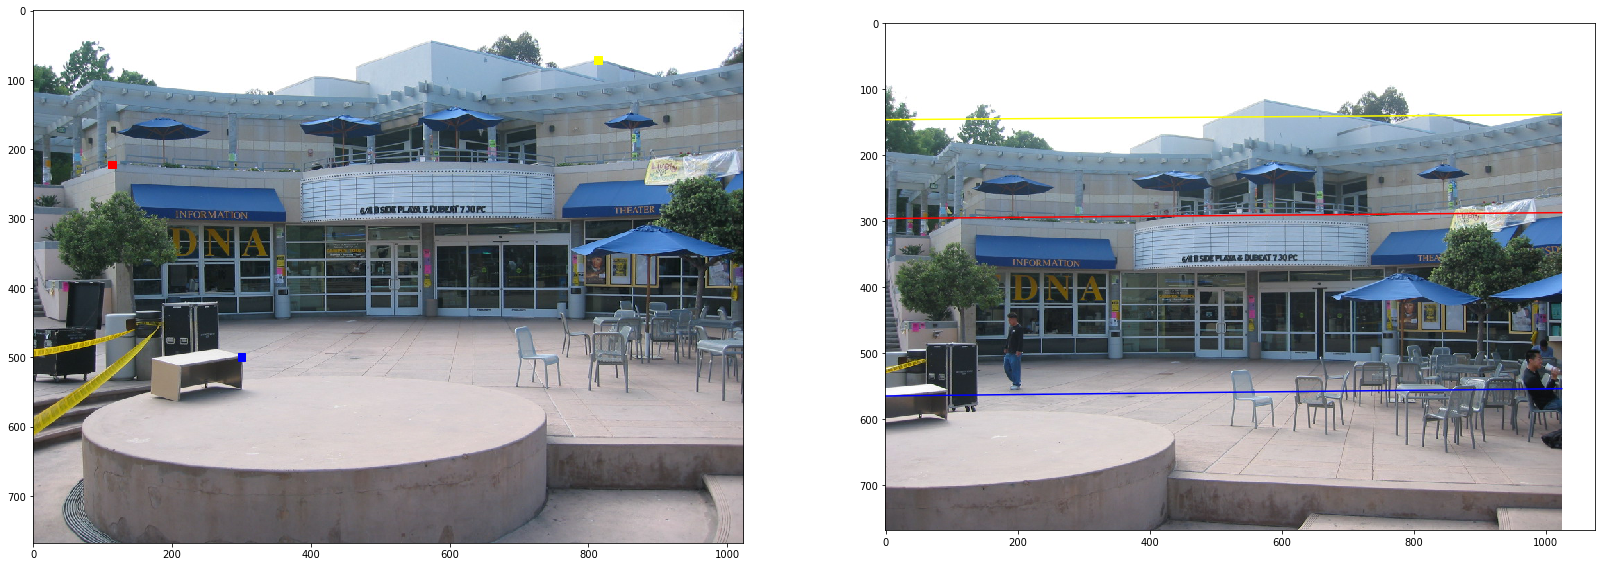

In [18]:
"""your code here"""
xchosen1 = np.array([[113,300,814],[222,500,71]])
# display the figures
plt.figure(figsize=(28,16))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
im_height, im_width = I1.shape[:2]
x_ax = np.linspace(0, im_width, im_width*10)
print("im_height:{}, im_width:{}".format(im_height, im_width))

colors = ['red', 'blue', 'yellow']
for i in range(xchosen1.shape[1]):
    epi_line = F_LM @ Homogenize(xchosen1[:,i:i+1])
    a, b, c = epi_line
    xx, yy = [], []
    for xval in x_ax:
        yval = -(a/b)*xval - c/b
        if yval > 0 and yval < im_width:
            xx.append(xval)
            yy.append(yval)
    x1,y1 = xchosen1[:,i]
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, 
                                    fill=True, color=colors[i]))
    ax2.plot(xx,yy,'-r', color=colors[i])
plt.show()

#### Comment: By computing epipolar line $ l_{i}^{'} = Fx_{i} $, we can see that $ l_{i}^{'} $ exactly passes through $x^{'}_{i}$ , we can tell that the accuracy of F is high.

## Problem 8 (Programming): Projective to Euclidean Reconstruction (15 points)

You are given a Matlab file containing points obtained from applying three-view geometry techniques (using the trifocal tensor) to obtain a projective reconstruction of points from a 3D scene. Also in the file are groundtruth control points. Compute the homography transformation using the DLT along with the projected 3D scene points and control points to upgrade the projective reconstruction to a Euclidean reconstruction. Render the scene, and comment on your results. What does the scene look like? (You may have to rotate the plot to get a better view.)


In [19]:
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as sio

reconstruction = sio.loadmat('ereconstruction.mat')
X_projective = reconstruction['X_projective']
X_projective = X_projective.T
X_control = reconstruction['X_c']
X_control = X_control.T


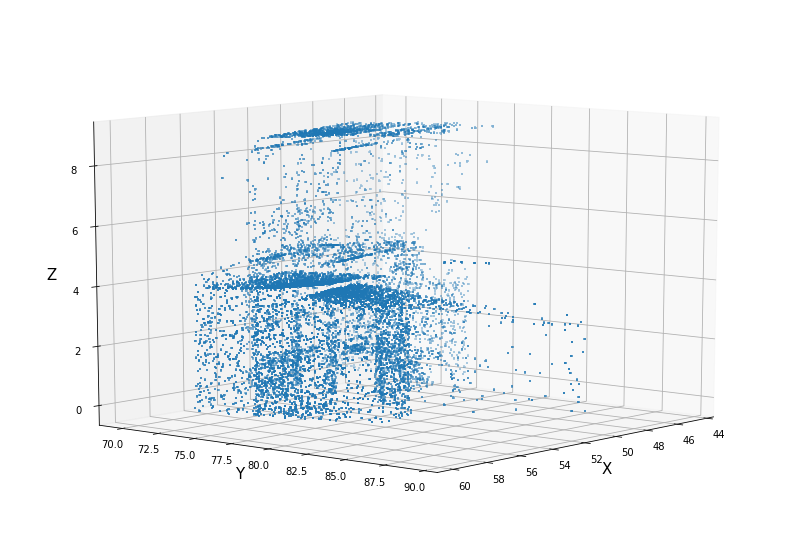

In [20]:
def leftnull(sub_x):
    sub_x = np.reshape(sub_x,(sub_x.size,1))
    u, _, _ = np.linalg.svd(sub_x,full_matrices=True) 
    _leftnull = u[:,1:].T
    return _leftnull

def ComputeHomography(Xp, Xc):
    """your code here"""
    Xp_norm, T1 = Normalize(Xp)
    Xc_norm, T2 = Normalize(Xc)
    A = np.zeros((3*6, 16))
    for i in range(Xc.shape[1]):
        Xc_leftnull = leftnull(Xc_norm[:,i:i+1])
        x_kron = np.kron(Xc_leftnull, Xp_norm[:,i:i+1].T)
        A[3*i:3*i+3, :] = x_kron
    u, s, vh = np.linalg.svd(A)
    H_flatten = vh[15:16,:]
    H = H_flatten.reshape((4,4))
    H = np.linalg.inv(T2)@H@T1

    return H

ncontrol = X_control.shape[1]
H = ComputeHomography(Dehomogenize(X_projective[:ncontrol]), 
                      Dehomogenize(X_control))
X_euclidean = H @ X_projective
X_euclidean = Dehomogenize(X_euclidean)
Xe, Ye, Ze = X_euclidean[0,:], X_euclidean[1,:], X_euclidean[2,:] 
fig = plt.figure(figsize=(14, 10))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.view_init(10,40)
axis.scatter(Xe, Ye, Ze, marker="+", s=5)
axis.set_xlabel('X',size = 15)
axis.set_ylabel('Y',size = 15)
axis.set_zlabel('Z',size = 15)

plt.show()

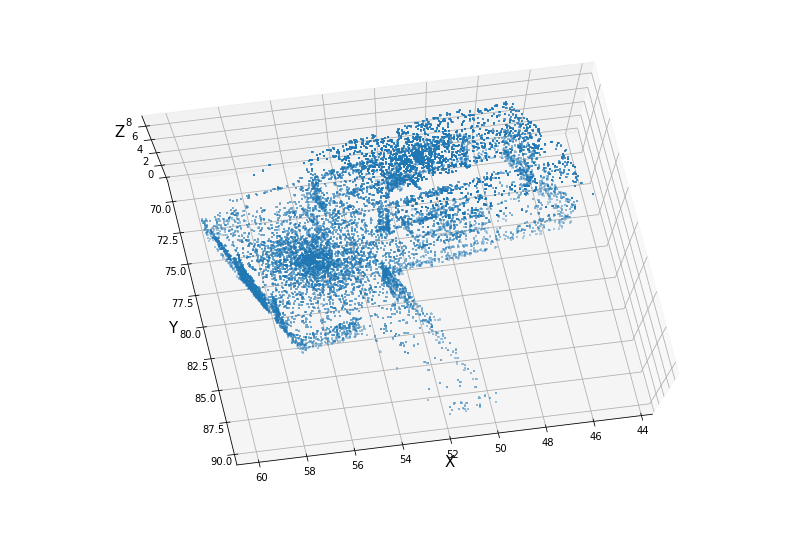

In [21]:
fig1 = plt.figure(figsize=(14, 10))
axis1 = fig1.add_subplot(1, 1, 1, projection="3d")
axis1.view_init(80,80)
axis1.scatter(Xe, Ye, Ze, marker="+", s=5)
axis1.set_xlabel('X',size = 15)
axis1.set_ylabel('Y',size = 15)
axis1.set_zlabel('Z',size = 15)

plt.show()

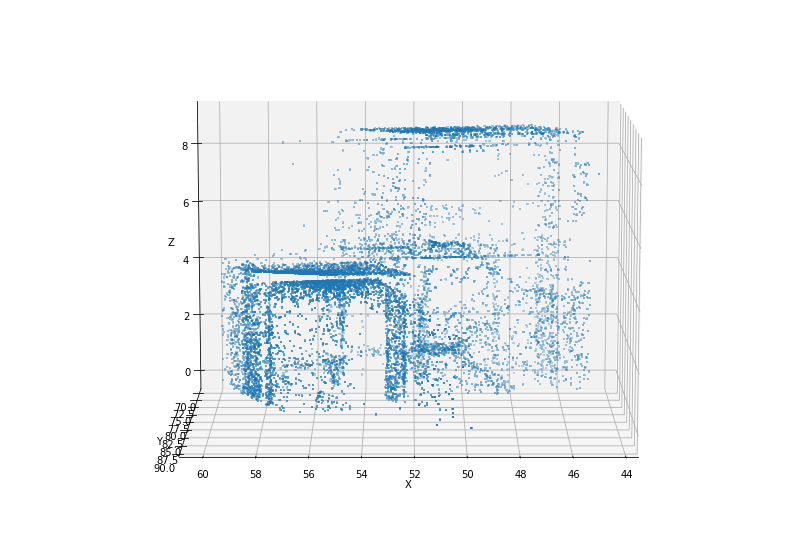

In [22]:
fig2 = plt.figure(figsize=(14, 10))
axis2 = fig2.add_subplot(1, 1, 1, projection="3d")
axis2.view_init(10,90)
axis2.scatter(Xe, Ye, Ze, marker="+", s=5)
axis2.set_xlabel('X')
axis2.set_ylabel('Y')
axis2.set_zlabel('Z')

plt.show()

### Comment on Result: From above views from 3 angles, it seems the 3d points construct a building of two floors, with a slope on the left one-floor building connecting to the floor.